In [1]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [3]:
df_weather = pd.DataFrame(pd.read_excel("/Users/shannyntan/Desktop/UG Solar/Loanhead_weatherdata_01Jul22-13Feb24.xlsx", skiprows=3)) 
meter_df = pd.DataFrame(pd.read_excel("/Users/shannyntan/Desktop/UG Solar/SolarFarm_Data.xlsx", sheet_name=0))
output_df = pd.DataFrame(pd.read_excel("/Users/shannyntan/Desktop/UG Solar/SolarFarm_Data.xlsx", sheet_name=1))

In [4]:
df_weather.shape

(14232, 18)

0 temperature_2m (°C)
1 relative_humidity_2m (%)
2 dew_point_2m (°C)
3 precipitation (mm)
4 cloud_cover (%)
5 shortwave_radiation (W/m²)
6 direct_radiation (W/m²)
7 diffuse_radiation (W/m²)
8 direct_normal_irradiance (W/m²)
9 global_tilted_irradiance (W/m²)
10 terrestrial_radiation (W/m²)
11 shortwave_radiation_instant (W/m²)
12 direct_radiation_instant (W/m²)
13 diffuse_radiation_instant (W/m²)
14 direct_normal_irradiance_instant (W/m²)
15 global_tilted_irradiance_instant (W/m²)
16 terrestrial_radiation_instant (W/m²)


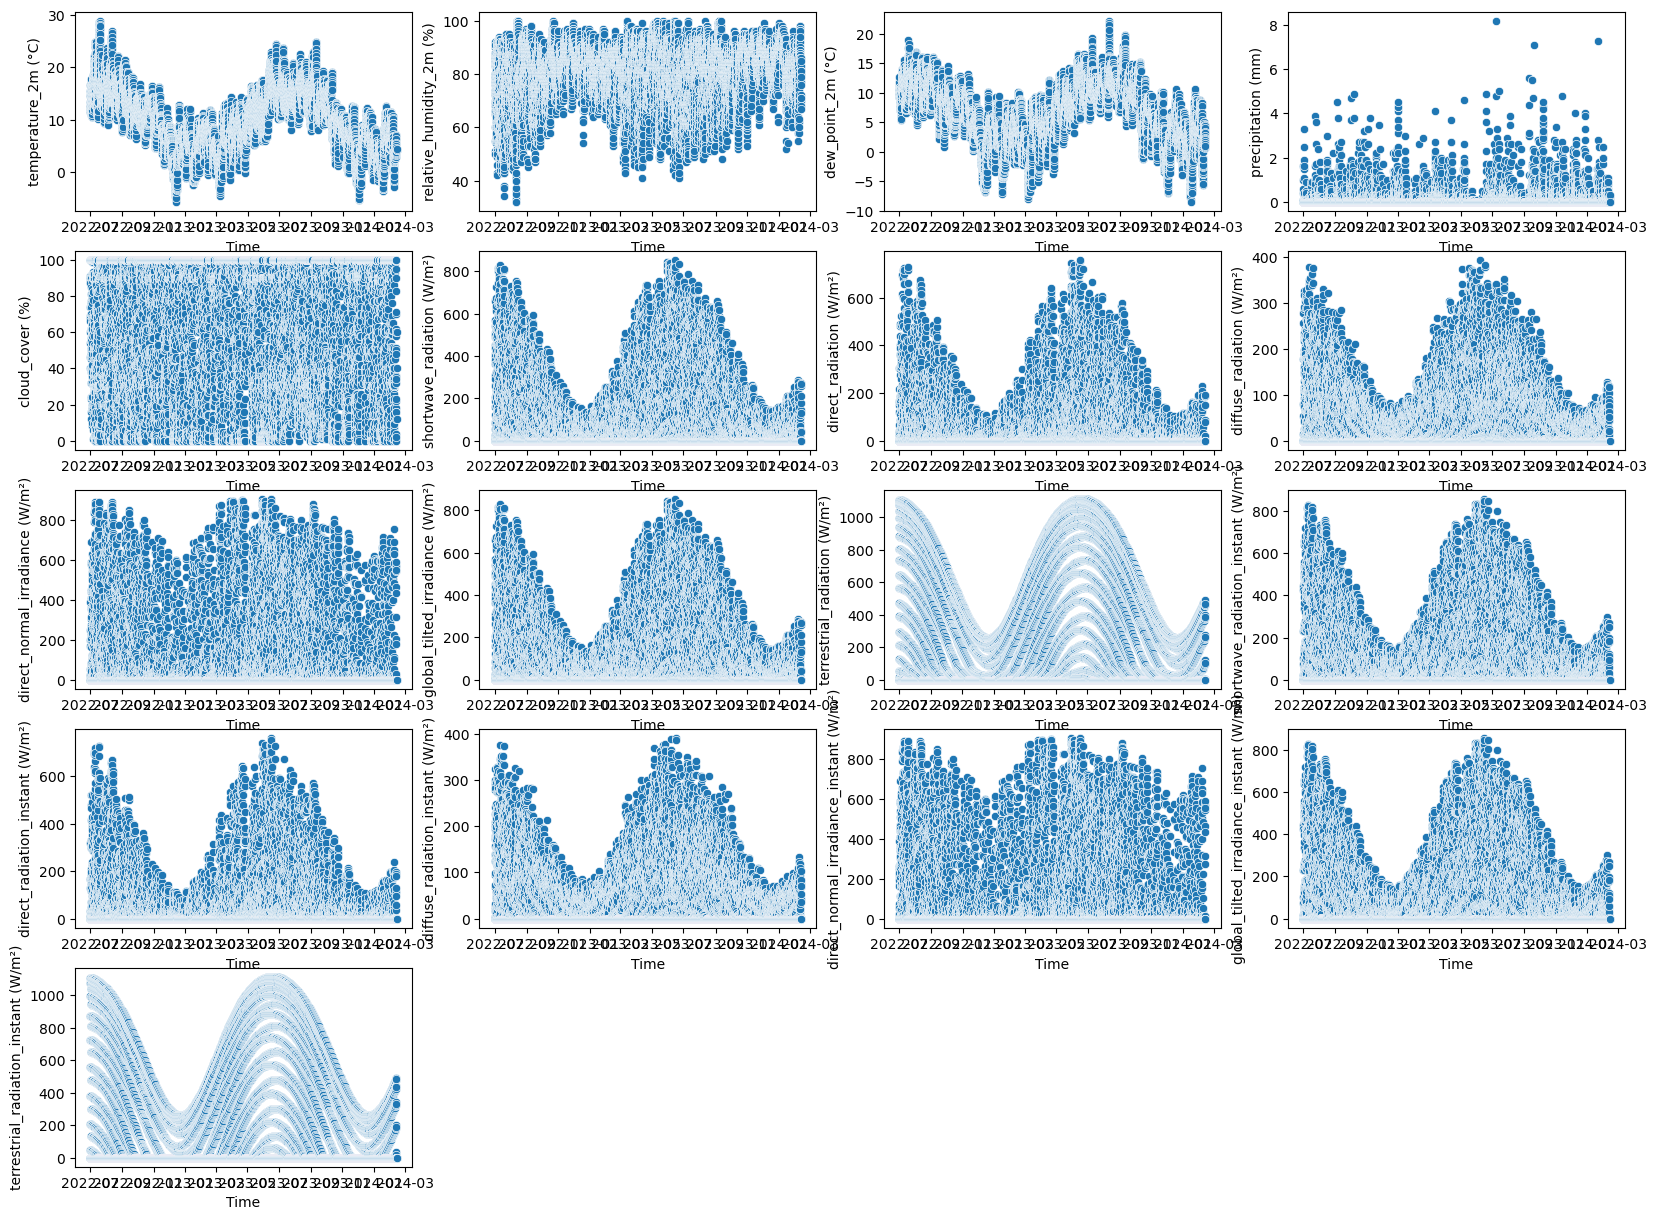

In [5]:
df_weather_plot = df_weather.drop(['time'], axis = 1)
fig = plt.figure(figsize=(20,15))
count = 0
for i,col in enumerate(df_weather_plot.columns):
    
    print(i,col)
    ax = fig.add_subplot(5,4,i+1)
    sns.scatterplot(data=df_weather, x = "time", y = col, ax=ax)
    ax.set_xlabel("Time")
    
plt.show()


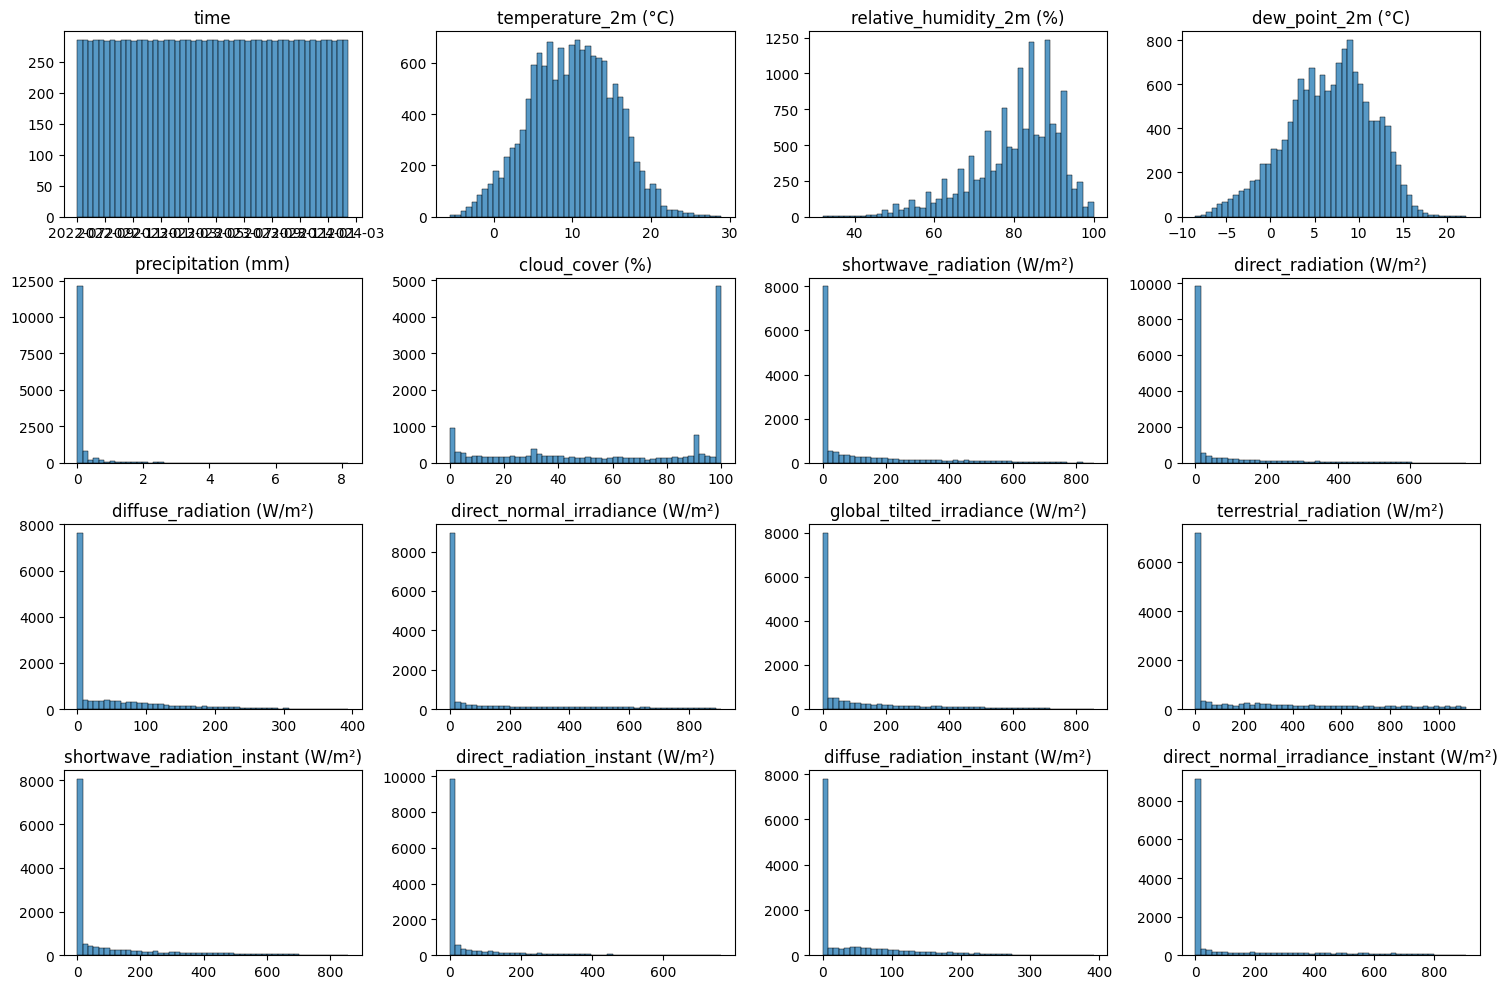

In [6]:
sns.scatterplot(data=df_weather, x = df_weather.time, y = "temperature_2m(°C)")

ValueError: Could not interpret value `temperature_2m(°C)` for parameter `y`

In [ ]:
asfdg